# Need to cluster the Developing brain data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc

from ALLCools.clustering import \
    tsne, \
    significant_pc_test, \
    filter_regions, \
    remove_black_list_region, \
    lsi, \
    binarize_matrix
from ALLCools.plot import *
from ALLCools.mcds import MCDS

In [2]:
import os
os.chdir("/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/snm3c/hh_micro_mono/")

In [3]:
dev_metadata = pd.read_csv("DevelopingHumanBrain_MGC/meta.tsv", header=0, sep="\t")
dev_metadata.set_index("Cell_Id", inplace=True)

In [4]:
fetal_mcg_adata = sc.read_h5ad("DevelopingHumanBrain_MGC/processed/mCG_raw.mcad")

In [5]:
fetal_mcg_adata.obs["cluster"] = dev_metadata.loc[fetal_mcg_adata.obs_names, "L4"].copy()

In [6]:
binarize_matrix(fetal_mcg_adata, cutoff=0.95)
filter_regions(fetal_mcg_adata)

23589 regions remained.


In [7]:
lsi(fetal_mcg_adata, algorithm="arpack", obsm="X_pca")
n_components = significant_pc_test(fetal_mcg_adata, p_cutoff=0.9, update=True)

11 components passed P cutoff of 0.9.
Changing adata.obsm['X_pca'] from shape (405, 100) to (405, 11)


In [8]:
sc.pp.neighbors(fetal_mcg_adata)
sc.tl.leiden(fetal_mcg_adata, resolution=1)

In [9]:
try:
    sc.tl.paga(fetal_mcg_adata, groups="leiden")
    sc.pl.paga(fetal_mcg_adata, plot=False)
    sc.tl.umap(fetal_mcg_adata, init_pos="paga")
except:
    sc.tl.umap(fetal_mcg_adata)

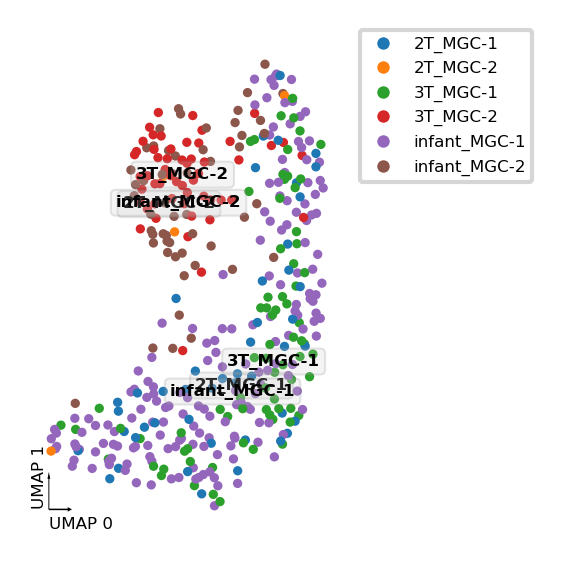

In [10]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
_ = categorical_scatter(
    data=fetal_mcg_adata,
    ax=ax,
    coord_base="umap",
    hue="cluster",
    text_anno="cluster",
    show_legend=True
)
plt.tight_layout()